# Spencer Hallyburton
## Collaborator: Salvador Barragan
# APMTH 207: Advanced Scientific Computing: 
## Stochastic Methods for Data Analysis, Inference and Optimization
## Homework 11
**Harvard University**<br>
**Spring 2017**<br>
**Instructors: Rahul Dave**<br>
**Due Date: ** Monday, April 23rd, 2018 at 11:59pm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta
import seaborn as sns
from scipy.misc import comb

## The AM207 Cambridge Nursery

A plant nursery in Cambridge is exprimentally cross-breeding two types of hibiscus flowers: blue and pink. The goal is to create an exotic flower whose petals are pink with a ring of blue on each. 

There are four types of child plant that can result from this cross-breeding: 

  - Type 1: blue petals
  - Type 2: pink petals 
  - Type 3: purple petals
  - Type 4: pink petals with a blue ring on each (the desired effect). 

Out of 197 initial cross-breedings, the nursery obtained the following distribution over the four types of child plants: 
$$Y = (y_1, y_2, y_3, y_4) = (125, 18, 20, 34)$$
where $y_i$ represents the number of child plants that are of type $i$.

The nursery then consulted a famed Harvard plant geneticist, who informed them that the probability of obtaining each type of child plant in any single breeding experiment is as follows:
$$ \frac{\theta+2}{4}, \frac{1-\theta}{4}, \frac{1-\theta}{4}, \frac{\theta}{4}.$$
Unfortunately, the geneticist did not specify the quantity $\theta$.

Clearly, the nursery is interested in understanding how many cross-breeding they must perform, on average, in order to obtain a certain number of child plants with the exotic blue rings. To do this they must be able to compute $\theta$. 

The owners of the nursery, being top students in AM207, decided to model the experiment in hopes of discovering $\theta$ using the results from their 197 initial experiments. 

They chose to model the observed data using a multinomial model and thus calculated the likelihood to be:
$$ p(y  \vert  \theta) \propto (2+\theta)^{y_1} (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$

Being good Bayesians, they also imposed a prior on $\theta$, $\rm{Beta}(a, b)$.

Thus, the posterior is:
$$ p(\theta \vert  Y) \propto \left( 2+\theta \right)^{y_1} (1-\theta)^{y_2+y_3} \, \theta^{
y_4} \, \theta^{a-1} \, (1-\theta)^{b-1}. $$

If the nursery owners are able to sample from the posterior, they would be able to understand the distribution of $\theta$ and make appropriate estimates.

## Problem 1. Sampling using data augmentation

Realizing that it would be difficult to sample from the posterior directly and after being repeatedly frustrated by attempts of Metropolis-Hastings and Gibbs sampling for this model, the nursery owners decided to augment their model and hopefully obtain a friendlier looking distribution that allows for easy sampling.

They augment the data with a new variable $z$ such that:
$$z + (y_1 - z) = y_1.$$
That is, using $z$, we are breaking $y_1$, the number of type I child plants, into two subtypes. Let the probability of obtaining the two subtype be $1/2$ and $\theta/4$, respectively. Now, we can interpret $y_1$ to be the total number of trials in a binomial trial. Thus, the new likelihood can be written as
$$ p(y, z  \vert  \theta) \propto \binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}
$$


Derive the joint posterior $p(\theta, z  \vert  y)$ and sample from it using Gibbs sampling.

Visualize the distribution of theta and, from this distribution, estimate the probability of obtaining a type 4 child plant (with the blue rings) in any cross-breeding experiment.

#### Deriving the joint posterior:
To find the joint posterior, $p(\theta,z\vert y)$, we can write using the definition of conditional probabilities that 

$$p(\theta,z\vert y) = p(z \vert \theta,y) p(\theta \vert y)$$

Then we can use the fact that $p(y,z\vert \theta)=p(z\vert \theta,y)p(y\vert \theta)$ in order to substitute for the $p(z \vert \theta,y)$ term to obtain:

$$p(\theta,z\vert y) = \frac{p(y,z\vert \theta)}{p(y\vert \theta)}p(\theta \vert y)$$

Given that $p(\theta \vert y) = p(y \vert \theta)p(\theta)$ by the conditional definition, we can make another substitution to obtain:

$$p(\theta,z\vert y) = \frac{p(y,z\vert \theta)}{p(y\vert \theta)} p(y\vert \theta) p(\theta)\\
p(\theta,z\vert y) = p(y,z\vert \theta) p(\theta)$$

We recognize $ p(y,z\vert \theta) $ as the complete data likelihood multinomial distribution and $p(\theta)$ as our beta prior on the values of $\theta$. If we plut in these distributions, we obtain:

$$p(\theta,z\vert y) \propto \bigg[\binom{y_{1}}{z} \left (\frac{1}{2} \right )^{y_1-z} \left(\frac{\theta}{4} \right )^{z}  (1-\theta)^{y_2+y_3}  \, \theta^{y_4}\bigg]\bigg[\theta^{a-1} \, (1-\theta)^{b-1}\bigg]$$

#### Conditional Distributions
From this joint posterior, we now wish to derive the conditional distributions on $z$ and $\theta$ in order to use a Gibbs sampling strategy.

**1.**
We'll start with the conditional distribution for theta: $p(\theta \vert z,y)$. We will ignore terms that have no dependence on $\theta$.

$$p(\theta \vert z,y) \propto \theta^z (1-\theta^{y_2+y_3})\theta^{y_4}\theta^{a-1}(1-\theta)^{b-1}$$
$$p(\theta \vert z,y) \propto \theta^{z+y_4+a-1}(1-\theta)^{y_2+y_3+b-1}$$

which is exactly a beta distribution with $\alpha = z+y_4+a$ and $\beta = y_2+y_3+b$.


**2.**
Now we will derive the conditional for z: $p(z \vert \theta,y)$. We wil ignore terms that have no dependence on z. First, we must recognize that the formula in the above section is not completely forthright in its terminology. It reintroduces a 1/4 term in the contribution from $y_1$ to the multinomial model, but neglects to do so with the other terms. In order to correct for this, we can equivalently remove the 1/4 factor from these two additional terms. The detailed reason why we can remove all of these 1/4 factors is that, if we had 1/4 factors across all terms, we could combine coefficients to transform $(1/4)^{y_1-z}(1/4)^{z}(1/4)^{y_2}(1/4)^{y_3}(1/4)^{y_4}$ into a term $(1/4)^{\sum[y_i]}$ which is a constant in z. As a result, we can pull this term out of the multinomial expression. Thus

$$p(z \vert \theta,y) \propto \binom{y_1}{z} \bigg(\frac{1}{2}\bigg)^{y_1-z} \bigg(\frac{\theta}{4}\bigg)^{z}$$

should become

$$p(z \vert \theta,y) \propto \binom{y_1}{z} (2)^{y_1-z} (\theta)^{z}$$

In order to manipulate this, we can introduce two terms: $\bigg(\frac{2+\theta}{2+\theta}\bigg)^{z}$ and $\bigg(\frac{2+\theta}{2+\theta}\bigg)^{y_1+z}$

so that 

$$p(z \vert \theta,y) \propto \binom{y_1}{z} \bigg(\frac{2}{2+\theta}\bigg)^{y_1-z} \bigg(\frac{\theta}{2+\theta}\bigg)^{z} (2+\theta)^{y_1-z}(2+\theta)^{z}$$

Thus we see that the two terms at the end can combine to form $(2+\theta)^{y_1}$ which is a constant in z that we can take out of the expression.

$$p(z \vert \theta,y) \propto \binom{y_1}{z} \bigg(\frac{2}{2+\theta}\bigg)^{y_1-z} \bigg(\frac{\theta}{2+\theta}\bigg)^{z}$$

Now we see that this is exactly a binomial expression with $n=y_1$ and $p=\frac{\theta}{2+\theta}$.

In [2]:
y = [125,18,20,34]
a = 1
b = 1

In [3]:
# Define the conditionals:
def zcond(theta, y):    
    return binom.rvs(y[0], 1 - 1/2 / (1/2 + theta/4))

def thcond(z, y, a, b):
    return beta.rvs(z+y[3]+a, y[1]+y[2]+b)

In [4]:
# Define gibbs
def gibbs(ZgivenTh_sample, ThgivenZ_sample, N, start = [0, 0]):
    Z=start[0]
    Th=start[1]
    samples=np.zeros((N+1, 2))
    samples[0,0]=Z
    samples[0,1]=Th
    
    for i in range(1,N,2):
        Z=ZgivenTh_sample(Th, y)
        samples[i,0]=Z
        samples[i, 1]=Th
        
        Th=ThgivenZ_sample(Z,y,a,b)
        samples[i+1,0]=Z
        samples[i+1,1]=Th
        
    return samples

In [5]:
out=gibbs(zcond, thcond, 100000, start=[y[0], 0.5])

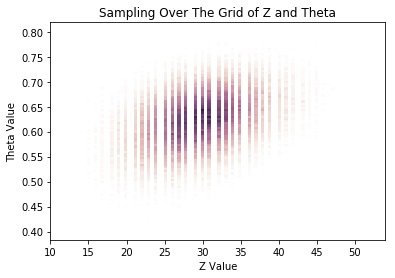

In [6]:
numgridpoints = 1000
burn = 10000
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.hist2d(out[burn:,0],out[burn:,1], normed=True, bins=100, cmap=cmap)
plt.xlabel('Z Value')
plt.ylabel('Theta Value')
plt.title('Sampling Over The Grid of Z and Theta')
plt.show()

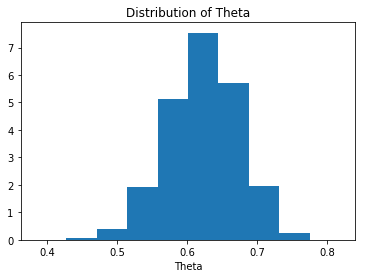

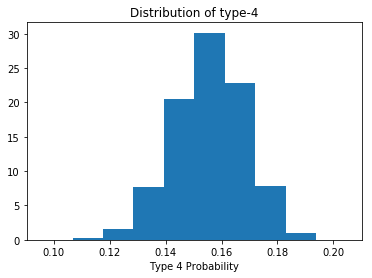

In [7]:
# Marginalize for the p(theta)
dist_theta = out[burn:,1]

# Plot the 1-D histogram for theta
plt.hist(dist_theta, normed=True)
plt.title('Distribution of Theta')
plt.xlabel('Theta')
plt.show()

# Plot a distribution of type-4 
plt.hist(dist_theta/4, normed=True)
plt.title('Distribution of type-4')
plt.xlabel('Type 4 Probability')
plt.show()

In [8]:
# Make an estimate for type-4:
print('Theta Output:', np.mean(dist_theta))
print('Probability of type 4:', np.mean(dist_theta)/4)

Theta Output: 0.623089560916
Probability of type 4: 0.155772390229


## Problem 2. Finding the MLE using Expectation Maximization

Treat the augmented model as a latent variable model. 

### Part A. 

Write down an expression (up to unimportant constants - you must decide what unimportant means) for each of the following:

(1) the observed data log likelihood

(2) the complete(full) data log likelihood

**Hint:** You should already have the observed data likelihood and the complete data likelihood from Problem 1, you just need to take their logs for this problem.

(3) the Auxilary function, $Q(\theta, \theta^{(t-1)})$, or the expected complete(full) data log likelihood, defined by
$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\text{the complete data log likelihood}]$$

In other words $Z  \vert  Y=y, \Theta = \theta^{t-1}$ is $q(z, \theta_{old})$ from lecture at the end of the E-step and $Q$ is the z-posterior expectation (at $\theta_{old}$) of the full data log likelihood, which is the ELBO minus the entropy of $q$ (which being evaluated at $\theta_{old}$ is not dependent on $\theta$ and thus irrelevant for maximization).

#### Log Likelihoods
(1) The observed log-likelihood is:
$$ y_1\log(2+\theta) + (y_2+y_3)\log(1-\theta) + (y_4)\log(\theta)$$

(2) The complete data log-likelihood is:
$$ \log({y_1\choose z}\bigg(\frac{1}{2}\bigg)^{y_1-z}\bigg(\frac{1}{4}\bigg)^{z}) + (y_2+y_3)\log(1-\theta) + (y_4+z)\log(\theta)$$

(3) The Auxiliary Function is:
$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\text{the complete data log-likelihood}]$$

which turns into:
$$ \mathbb{E}[h(y_1,z)]+(y_2+y_3)\log(1-\theta) + \log(\theta)[y_4+\mathbb{E}[z]] $$

where: 
$$ h(y_1,z)=\log({y_1\choose z}\bigg(\frac{1}{2}\bigg)^{y_1-z}\bigg(\frac{1}{4}\bigg)^{z})$$

$$\mathbb{E}[z]=y_1\frac{\theta^{(t-1)}}{\theta^{(t-1)}+2}$$

#### Auxiliary Function:
We can move from the complete data log likelihood to the auxiliary function by taking an expectation:

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}_{Z  \vert  Y=y, \Theta = \theta^{t-1}}[\text{Log Likelihood}]$$.

Thus,

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}\bigg[\log\big[{y_1 \choose z} \bigg(\frac{1}{2}\bigg)^{y_1-z}\bigg(\frac{1}{4}\bigg)^{z}\big] + (y_2+y_3)\log(1-\theta) + (y_4+z)\log(\theta) \bigg]$$

Since our expectation is over the value of our latent variable, z, we can simply apply it to elements that are functions of z. 

$$Q(\theta, \theta^{(t-1)}) = \mathbb{E}\big[h(y_1,z)\big] + (y_2+y_3)\log(1-\theta) + (y_4+\mathbb{E}[z])\log(\theta)$$

With the benefit of forethought, we will hold of on executing the first expectation term. In order to find $\mathbb{E}[z]$, we can return to our interpretations in a binomial sense from problem 1 and assert the following:



In [9]:
# Write functions for the log likelihoods:
def log_obs_data_likelihood(Y, theta):
    p = y[0]*np.log(2+theta) + (y[1]+y[2])*np.log(1-theta) + y[3]*np.log(theta)
    return p
def log_full_data_likelihood(Y, z, theta):
    p = np.log(comb(y[0],z)) + (y[0]-z)*np.log(1/2) + z*np.log(theta/4) + (y[1]+y[2])*np.log(1-theta) + y[3]*np.log(theta)
    return p

In [10]:
# Initialize the theta value
# Auxiliary function: Q(theta(t),theta(t-1)) --> this is the expected value of the log likelihood function
def aux_Q(Y, theta0, theta):
    expect_overz = (theta0/(2+theta0)*Y[0]+Y[3])*np.log(1-theta) + (Y[1]+Y[2])*np.log(theta)
    return expect_overz

In [11]:
def aux_Q(Y, theta0, theta):
    expect_overz = (theta0/(2+theta0)*Y[0]+Y[3])*np.log(1-theta) + (Y[1]+Y[2])*np.log(theta)
    return expect_overz

### Part B:

We will maximize the likelihood through Expectation Maximization (EM). In order to preform EM, we must iterate through the following steps

- (Expectation) Compute the Auxilary function, $Q(\theta, \theta^{t-1})$ (the expectation of the full data likelihood)
- (Maximization) Compute $\theta^{t} = \text{argmax}_\theta Q(\theta, \theta^{(t-1)})$

Thus, you must compute exact formulae for the following:
1. the Auxilary function, $Q(\theta, \theta^{(t-1)})$, for a given $\theta^{(t-1)}$. That is, compute the expectation of the complete data log likelihood.
2. $\theta^{t}$, by maximizing the Auxilary function $Q(\theta, \theta^{(t-1)})$.

**Hint:** You don't actually need to do any difficult optimization for the M-step. After taking the expectation of the complete data log likelihood in the E-step, match your $Q(\theta, \theta^{(t-1)})$ to the log pdf of a familiar distribution, then use the known formula for the mode of this distribution to optimize $Q(\theta, \theta^{(t-1)})$.

Use these to **estimate the MLE** of $\theta$ using EM (choose your own reasonable criterion for convergence).

#### E-Step
We showed this in the previous section in part A!

#### M-Step: Maximizing the Auxiliary Function
At the M step of the EM algorithm, we wish to calculate the parameter value that maximizes our auxiliary function given our expectation calculation in the E step. We can do so with a simple derivative. Therefore, $ \text{argmax}_\theta Q(\theta,\theta^{t-1})$ occurs where:

$$\frac{\partial Q}{\partial \theta} = 0$$

We can see that the $ \mathbb{E}\big[h(y_1,z)\big] $ has no dependence on $\theta$, and thus it drops out during the derivative calculation. What we are left with is then,

$$-\frac{y_2+y_3}{1-\theta} + \frac{\frac{\theta^{t-1}}{\theta^{t-1}+2}y_1 + y_4}{\theta} = 0$$

We then solve for the theta that is completes this statement to get our next estimate:

$$\theta^t = \frac{\frac{\theta^{t-1}}{\theta^{t-1}+2}y_1 + y_4}{\frac{\theta^{t-1}}{\theta^{t-1}+2}y_1+y_2+y_3+y_4}$$

Given this update rule, we can now iterate to update $\theta^t$ and $\theta^{t-1}$ until convergence.

In [12]:
crit = 1e-8
theta_old = 0
theta_new =.5
ll_vals = []

# Loop over until convergence
while np.abs(theta_new-theta_old) > crit:
    # Compute the theta updates
    theta_old = theta_new
    term1 = theta_old/(theta_old+2)*y[0]
    theta_new = (term1+y[3])/(term1+y[1]+y[2]+y[3])
    
    # Store log-likelihood value at each theta
    ll_vals.append(log_obs_data_likelihood(y, theta_new))

In [13]:
print('Theta Output', theta_new)
print('Probability of type 4:', theta_new/4)

Theta Output 0.6268214976288967
Probability of type 4: 0.15670537440722418


We can plot the log likelihood values to make sure that they are monotonically increasing as a check on our process!

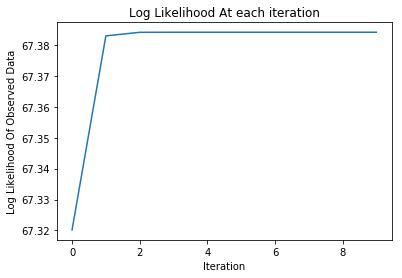

In [14]:
# Plot the log likelihood of the observed data
plt.title('Log Likelihood At each iteration')
plt.plot(ll_vals)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood Of Observed Data')
plt.show()